<a href="http://uca.edu.ar"><img src="http://uca.edu.ar/assets/images/UCA.svg" alt="Universidad Catolica Argentina" width="700px"></a>

## Trabajo Final del [Curso de Posgrado: Data Mining y Big Data](http://uca.edu.ar/es/facultades/facultad-de-ingenieria-y-ciencias-agrarias/posgrado/data-mining-y-big-data)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Bibicletas Públicas -CBA- 2018 </p>

## Tareas Pendientes

##### Atributos derivables

- [ ] Agregar distancia recorrida(dist): se calcula a partir de las coordenadas de estación origen/destino.
- [ ] Agregar velocidad media(v_med): se calcula a partir de la distancia y el tiempo de uso.

**Nota** Si la velocidad media es mayor a un umbral (v_med_max) para una determinada distancia, entonces se puede definir cuales usuarios usan o no el SUBE/SUBTE durante su recorrido.

##### Clima

- [ ] Lluvia_dia: True o False
- [ ] Temperatura_med_dia: Integer.
- [ ] Humedad_med_dia: Integer.

##### Calendario

- [ ] Definir fechas no laborables o de eventos.

### Planteamiento Inicial

Dado el comportamiento diario de los usuarios durante el día, ¿las bicicletas quedan repartidas entre las estaciónes

- ¿Exite un problema con la distribucipón de las bicibletas en la distintas estaciones?,de forma que, se aglomeran en unas estaciones y escasean en otras?

- ¿Podemos predecir esto?

#### Grupo 2:

- Agustina Bendayan
- Federido Ferrero
- Pablo Sierra

**Objetivo:**
- El objetivo del ejercicio es poder evaluar el comportamiento del uso de las ciclovías, tomando en cuenta:
    - El Clima
    - Dias no laborales en el calendario
    - GPS

**Modelos empleados:**
- Sin definir

**Parametros de validacion de modelos:**
- Sin definir

### Atributos[11]:
- **ID:** identificador unívoco anonimizado del usuario.
- **Periodo:** año de la recoleccion de los datos.
- **Origen Fecha:** indica la fecha inicio del recorrido.
- **Origen Estacion ID:** identificador numérico de la estacion donde se inicia el recorrido.
- **Origen Nombre:** nombre de la estacion donde se inicia el recorrido.
- **Destino Fecha:** indica la fecha de finalización del recorrido.
- **Destino Estación ID:** identificador numérico de la estacion donde finaliza el recorrido.
- **Destino Nombre:** nombre de la estacion donde se finaliza el recorrido.
- **Tiempo Uso:** tiempo total del recorrido.
- **Genero:** género del usuario, puede ser: hombre o mujer
- **Edad:** edad del usuario.

### Clase[0]:
- **Sin definir**

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Importamos las librerías
</p>

In [1]:
#podremos guardar la session del kernel
import dill


#funciones y clases particulares al caso de estudio
from localpacks.data import get_data, get_data_others, format_data, clean_garbage

#dataframes
import pandas as pd
import numpy as np

#Georeferenciación
import osmnx as ox
import geopandas

#graficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#modelos


<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Apertura del DF</p><br>

In [3]:
df = get_data(year=2018, apply_format=True) #seleccionamos el año 2018

In [4]:
df.shape

(2272605, 8)

In [4]:
df.head()

,id_usuario,bici_fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:05,00:19:53,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01 00:18:05,00:26:19,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01 00:20:14,00:27:39,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01 00:20:22,00:48:51,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01 00:20:31,00:49:27,Macacha Güemes,111,Acuña de Figueroa,54,F,27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272605 entries, 0 to 2272604
Data columns (total 9 columns):
id_usuario                      int64
bici_fecha_hora_retiro          object
bici_tiempo_uso                 object
bici_nombre_estacion_origen     object
bici_estacion_origen            int64
bici_nombre_estacion_destino    object
bici_estacion_destino           int64
bici_sexo                       object
bici_edad                       int64
dtypes: int64(4), object(5)
memory usage: 156.0+ MB


<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Data Cleaning</p><br>

<h1 style="font-size:1.5em;color:#2467C0">A. Inspeccion:</h1>
<p>En este apartado vamos a revisar el estado de nuestros datos. </p>

In [13]:
df.isnull().any()

id_usuario                      False
bici_tiempo_uso                 False
bici_nombre_estacion_origen     False
bici_estacion_origen            False
bici_nombre_estacion_destino    False
bici_estacion_destino           False
bici_sexo                       False
bici_edad                       False
bici_tiempo_uso_seg             False
dtype: bool

¡Excelente no tenemos valores nulos!

In [14]:
print('min', df['bici_edad'].min(),'\n',
      'mean', df['bici_edad'].mean(),'\n',
      'max', df['bici_edad'].max())

min 16 
 mean 33.116328178456 
 max 140


**Advertencia** Outliers en `'bici_edad'`

In [15]:
df['bici_tiempo_uso'].describe()

count                   2272605
mean     0 days 00:26:26.405977
std      0 days 00:23:36.253047
min             0 days 00:05:00
25%             0 days 00:11:56
50%             0 days 00:18:39
75%             0 days 00:31:32
max             0 days 23:03:00
Name: bici_tiempo_uso, dtype: object

**Advertencia** Outliers en `'bici_tiempo_uso'`

In [16]:
df['bici_sexo'].value_counts()

M    1629183
F     643387
N         35
Name: bici_sexo, dtype: int64

**Advertencia** valores en `'bici_tiempo_uso'`

<h1 style="font-size:1.5em;color:#2467C0">C. Acciones Cleaning:</h1>
<p>En este apartado vamos a tomar acciones para trabajar unicamente con datos limpios. </p>

### Primero con la edad

In [17]:
quartiles = np.percentile(df['bici_edad'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [18]:
df = df.query('(bici_edad > @mu - 5 * @sig) & (bici_edad < @mu + 5 * @sig)')

In [19]:
print('min', df['bici_edad'].min(),'\n',
      'mean', df['bici_edad'].mean(),'\n',
      'max', df['bici_edad'].max())

min 16 
 mean 33.1004119367011 
 max 81


Verficamos que el rango de edad, ahora está más acorde a lo esperado.

### Seguimos con el tiempo de uso

In [20]:
quartiles = np.percentile(df['bici_tiempo_uso_seg'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [21]:
quartiles

array([ 716., 1119., 1892.])

In [22]:
df = df.query('(bici_tiempo_uso_seg > @mu - 5 * @sig) & (bici_tiempo_uso_seg < @mu + 5 * @sig)')

**Nota:** dió un error al utilizar `bici_tiempo_uso`, por eso se utiliza `bici_tiempo_uso_seg` que es equivalente.

In [23]:
df['bici_tiempo_uso'].describe()

count                   2203211
mean     0 days 00:23:29.744581
std      0 days 00:16:15.443685
min             0 days 00:05:00
25%             0 days 00:11:46
50%             0 days 00:18:09
75%             0 days 00:29:45
max             0 days 01:31:10
Name: bici_tiempo_uso, dtype: object

### Finalizamos con el Género

In [24]:
df['bici_sexo'].value_counts()

M    1584162
F     619015
N         34
Name: bici_sexo, dtype: int64

In [25]:
garb = df[df['bici_sexo'] == 'N']
garb[:3]

,id_usuario,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,bici_tiempo_uso_seg
bici_fecha_hora_retiro,,,,,,,,,
2018-01-29 19:12:13,319159,00:43:18,Pque. Jose Evaristo Uriburu,155,Padilla,31,N,38,2598.0
2018-08-04 14:20:47,363100,00:27:50,Congreso,8,Congreso,8,N,22,1670.0
2018-09-20 12:25:23,345128,00:18:18,Colegio Nacional Buenos Aires,47,Marcelo T. de Alvear,135,N,28,1098.0


Los valores **N**, corresponden unicamente a esos tres `id_usuario`

In [26]:
df.drop(df[df['bici_sexo'] == 'N'].index, inplace=True) #Eliminamos esos valores

## saved Kernel 1

In [27]:
dill.dump_session(r'./kernels/notebook_env.db') # guardamos la sesion del kernel hasta aquí

<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Visualización</p><br>

## load Kernel 1

In [28]:
#iniciamos nuestro kernel desde aquí
import dill
dill.load_session(r'./kernels/notebook_env.db')

## Análisis Estadístico

In [29]:
df.shape #verificamos la dimensión de nuestro df

(2203169, 9)

### Frecuencia de uso en función de los meses

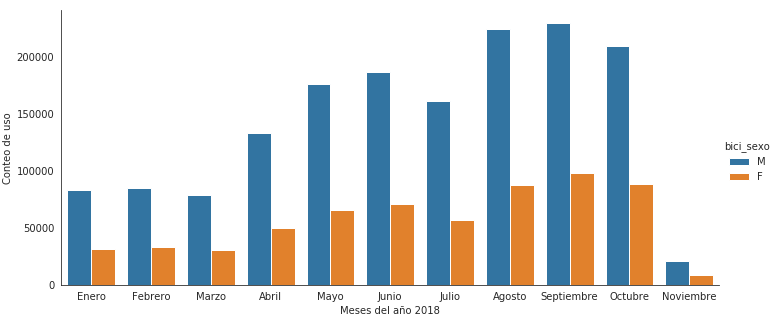

In [30]:
with sns.axes_style('white'):
    g = sns.catplot(x=df.index.month, hue='bici_sexo', data=df, aspect=2, kind="count")

g.set_ylabels('Conteo de uso')
g.set_xlabels('Meses del año 2018')
g.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre']);

### Frecuencia de uso en función de los meses, adicionando las edades en décadas

In [31]:
#Para generalizar el rango de edades, creamos una columna que almacena únicamente las décadas
df['bici_edad_dec'] = df.bici_edad.map(lambda bici_edad: 10 * (bici_edad // 10))

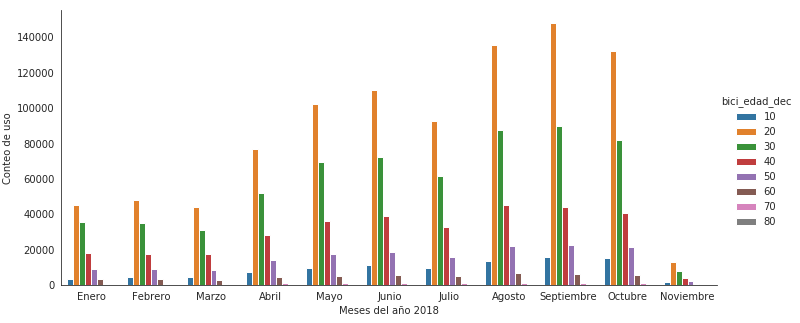

In [32]:
with sns.axes_style('white'):
    g = sns.catplot(x=df.index.month, hue='bici_edad_dec', data=df, aspect=2, kind="count")
g.set_ylabels('Conteo de uso')
g.set_xlabels('Meses del año 2018')
g.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre']);

# Georreferenciación

In [33]:
# Datos gps de las estaciones
estaciones = get_data_others('estaciones', format_data=True)
estaciones.head()

,nro_est,nombre,lat,long
0,1,Facultad de Derecho,-34.583133,-58.392452
1,2,Retiro,-34.592589,-58.374822
2,3,Aduana,-34.611242,-58.368918
3,4,Plaza Roma,-34.601721,-58.368950
4,6,Parque Lezama,-34.628301,-58.369709


### Conteo de usos Georeferenciando -- Estación Origen

In [35]:
#cargamos nuestro openstreetmap
G = ox.graph_from_place('Caba, Argentina', network_type='drive')
ox.save_graph_shapefile(G, 'openstreetmap_argentina', folder='.')
streets = geopandas.read_file("openstreetmap_argentina/edges/")

C:\Users\USUARIO\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
C:\Users\USUARIO\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


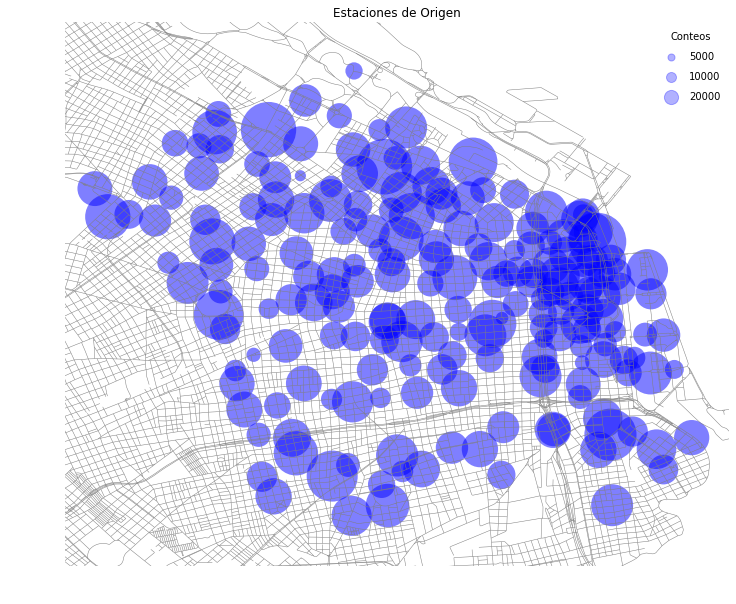

In [45]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))

lat, lon = estaciones['lat'], estaciones['long']

counts = df['bici_estacion_origen'].value_counts().sort_index()
plt.scatter(lon, lat, c='b', label=None, s=(counts/10), linewidth=0, alpha=0.5, )

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Estaciones de Origen')

plt.ylim(-34.65,-34.56)
plt.xlim(-58.46,-58.35)

for counts in [5000, 10000, 20000]:
    plt.scatter([], [], c='b', alpha=0.3, s=(counts/100), label=str(counts))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Conteos');
ax.set_axis_off();

### Conteo de usos Georeferenciando -- Estación Destino

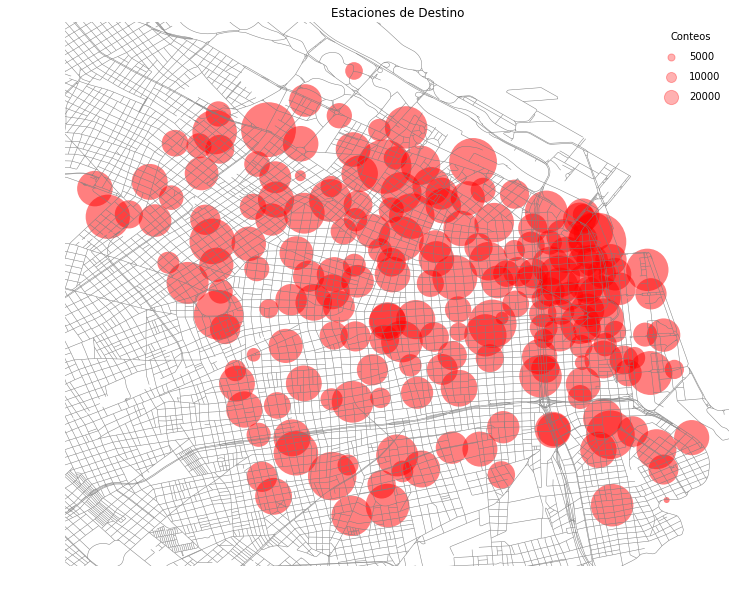

In [47]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))

lat, lon = estaciones['lat'], estaciones['long']

counts = df['bici_estacion_destino'].value_counts().sort_index()
plt.scatter(lon, lat, c='r', label=None, s=(counts/10), linewidth=0, alpha=0.5, )

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Estaciones de Destino')

plt.ylim(-34.65,-34.56)
plt.xlim(-58.46,-58.35)

for counts in [5000, 10000, 20000]:
    plt.scatter([], [], c='r', alpha=0.3, s=(counts/100), label=str(counts))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Conteos');
ax.set_axis_off();

### Tiempo de uso

C:\Users\USUARIO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


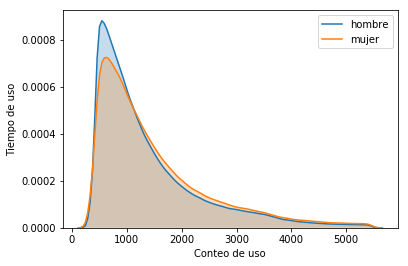

In [38]:
## Análisis del tiempo de uso

sns.kdeplot(df['bici_tiempo_uso_seg'][df['bici_sexo']=='M'], label='hombre', shade=True)
sns.kdeplot(df['bici_tiempo_uso_seg'][df['bici_sexo']=='F'], label='mujer', shade=True)
plt.ylabel('Tiempo de uso')
plt.xlabel('Conteo de uso');

#sns.scatterplot(x='bici_estacion_origen',y='bici_estacion_destino', data=df, hue='bici_sexo');